In [2]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed

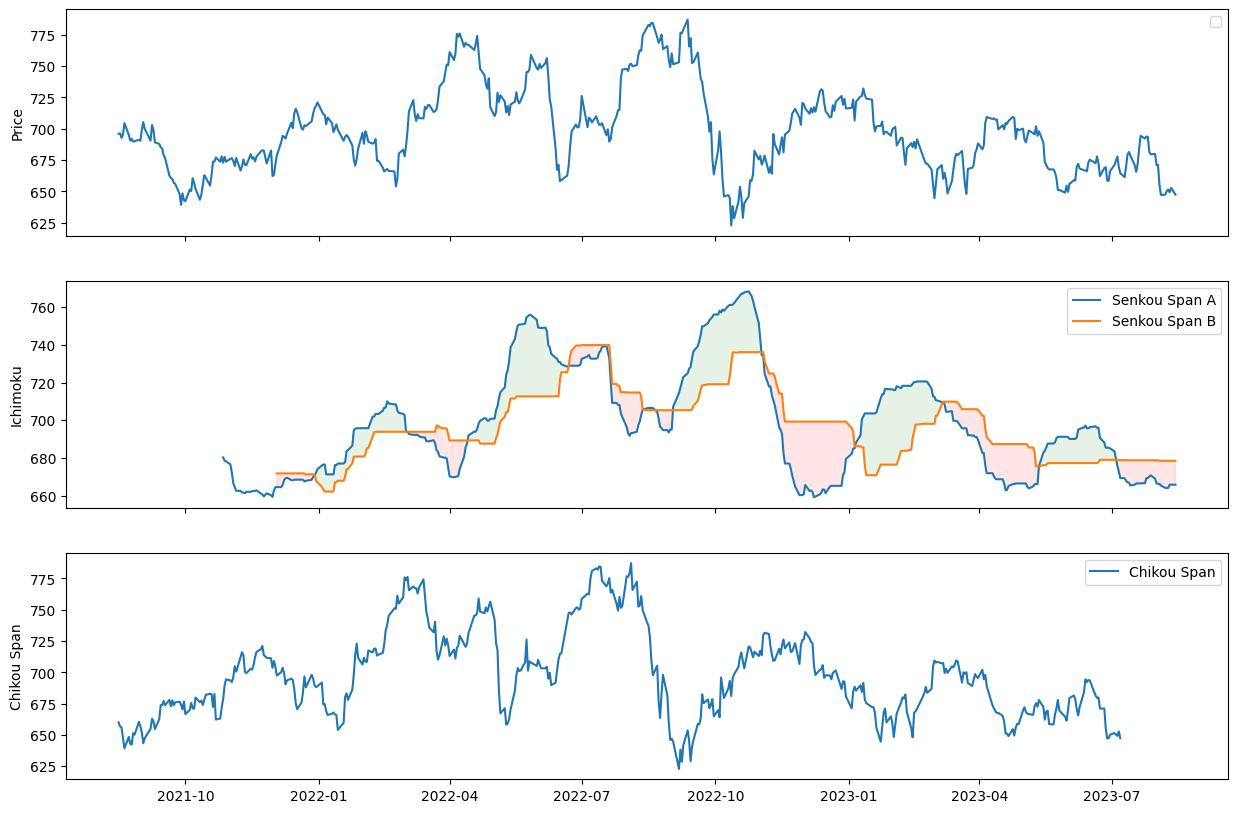

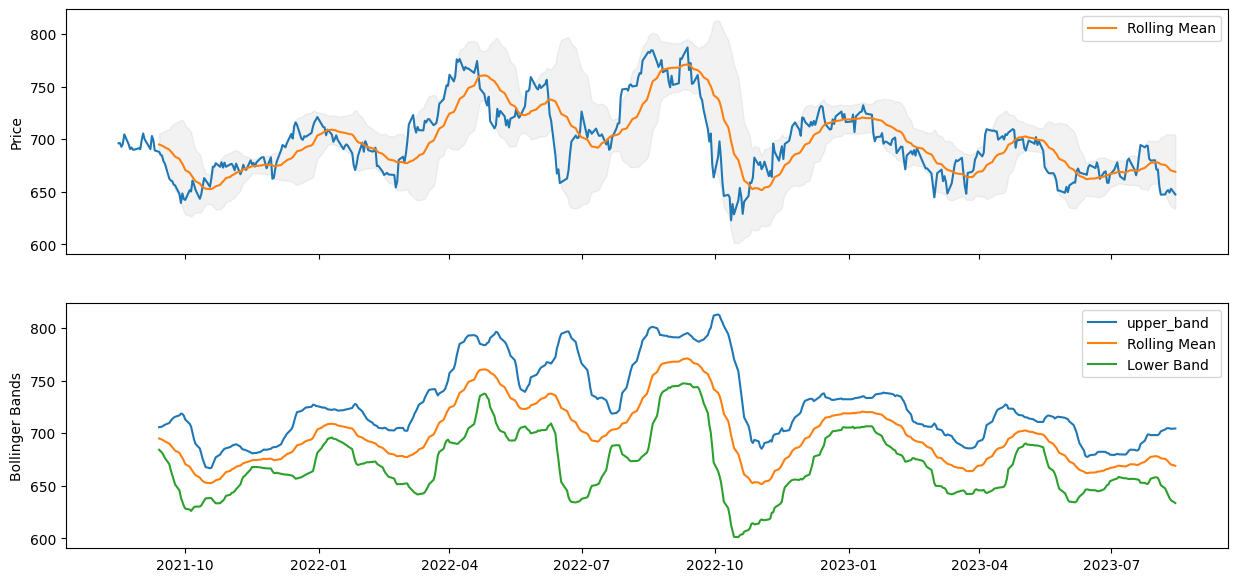

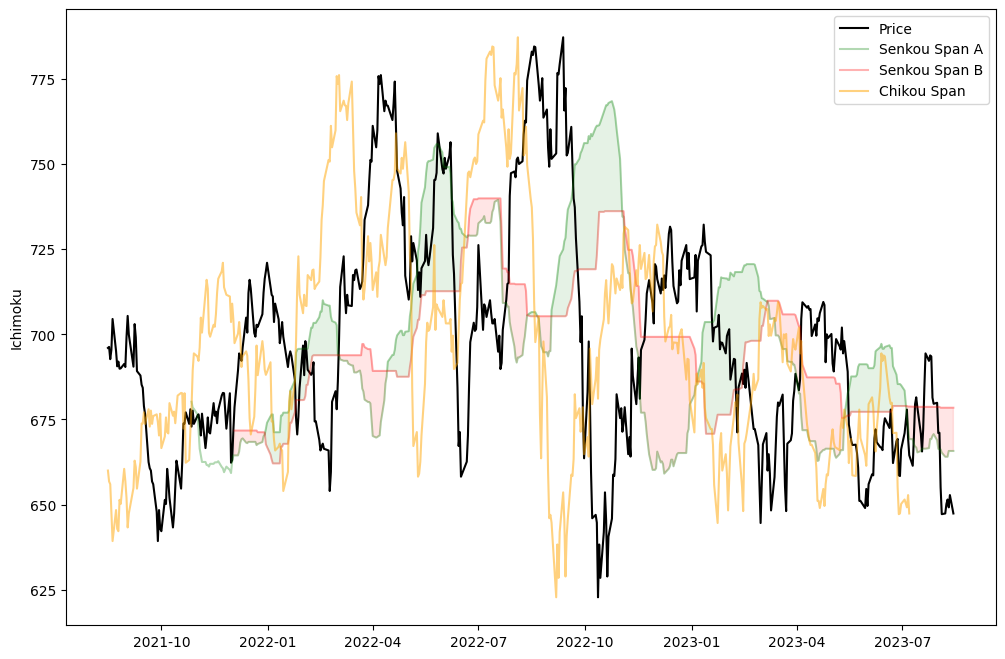

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

# Define the stock specifications
stock_symbol = "XAU=F"
start_date = "2021-08-15"
end_date = "2023-08-15"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

def calculate_tenkan_sen(high_prices, low_prices, window_length=9):
    tenkan_sen = (high_prices.rolling(window=window_length).max() + low_prices.rolling(window=window_length).min()) / 2
    return tenkan_sen

def calculate_kijun_sen(high_prices, low_prices, window_length=26):
    kijun_sen = (high_prices.rolling(window=window_length).max() + low_prices.rolling(window=window_length).min()) / 2
    return kijun_sen

def calculate_senkou_span_a(tenkan_sen, kijun_sen):
    senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
    return senkou_span_a

def calculate_senkou_span_b(high_prices, low_prices, window_length=52):
    senkou_span_b = (high_prices.rolling(window=window_length).max() + low_prices.rolling(window=window_length).min()) / 2
    senkou_span_b = senkou_span_b.shift(26)
    return senkou_span_b

def calculate_chikou_span(close_prices, window_length=26):
    chikou_span = close_prices.shift(-window_length)
    return chikou_span

def calculate_bollinger_bands(close_prices, window_length=20, num_std=2):
    rolling_mean = close_prices.rolling(window=window_length).mean()
    rolling_std = close_prices.rolling(window=window_length).std()
    upper_band = rolling_mean + (num_std * rolling_std)
    lower_band = rolling_mean - (num_std * rolling_std)
    return upper_band, rolling_mean, lower_band

tenkan_sen = calculate_tenkan_sen(df['High'], df['Low'])
kijun_sen = calculate_kijun_sen(df['High'], df['Low'])
senkou_span_a = calculate_senkou_span_a(tenkan_sen, kijun_sen)
senkou_span_b = calculate_senkou_span_b(df['High'], df['Low'])
chikou_span = calculate_chikou_span(df['Close'])

# Plot the stock price and the indicators
fig, axs = plt.subplots(3, sharex=True, figsize=(15, 10))
axs[0].plot(df.index, df['Close'])
axs[0].set_ylabel('Price')
axs[0].legend()
axs[1].plot(df.index, senkou_span_a, label='Senkou Span A')
axs[1].plot(df.index, senkou_span_b, label='Senkou Span B')
axs[1].fill_between(df.index, senkou_span_a, senkou_span_b, where=senkou_span_a >= senkou_span_b, interpolate=True, alpha=0.1, color='green')
axs[1].fill_between(df.index, senkou_span_a, senkou_span_b, where=senkou_span_a < senkou_span_b, interpolate=True, alpha=0.1, color='red')
axs[1].set_ylabel('Ichimoku')
axs[1].legend()
axs[2].plot(df.index, chikou_span, label='Chikou Span')
axs[2].set_ylabel('Chikou Span')
axs[2].legend()
plt.show()

upper_band, rolling_mean, lower_band = calculate_bollinger_bands(df['Close'])
fig, axs = plt.subplots(2, sharex=True, figsize=(15, 7))
axs[0].plot(df.index, df['Close'])
axs[0].plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean')
axs[0].fill_between(upper_band.index, upper_band.values, lower_band.values, alpha=0.1, color='grey')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[1].plot(upper_band.index, upper_band.values, label='upper_band')
axs[1].plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean')
axs[1].plot(lower_band.index, lower_band.values, label='Lower Band')
axs[1].set_ylabel('Bollinger Bands')
axs[1].legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'], label='Price', color='black')
plt.plot(df.index, senkou_span_a, label='Senkou Span A', color='green', alpha=0.3)
plt.plot(df.index, senkou_span_b, label='Senkou Span B', color='red', alpha=0.3)
plt.fill_between(df.index, senkou_span_a, senkou_span_b, where=senkou_span_a >= senkou_span_b, interpolate=True, alpha=0.1, color='green')
plt.fill_between(df.index, senkou_span_a, senkou_span_b, where=senkou_span_a < senkou_span_b, interpolate=True, alpha=0.1, color='red')
plt.ylabel('Ichimoku')
plt.plot(df.index, chikou_span, label='Chikou Span', color='orange', alpha=0.5)
plt.legend()
plt.show()